In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Blood Pressure Multiple Linear Regression.xlsx")

In [4]:
df.head()

,Blood Pressure,Age,Weight,Cholesterol
0,78,58,76,153
1,91,48,70,234
2,79,34,52,195
3,93,62,99,190
4,85,27,62,243


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Blood Pressure  30 non-null     int64
 1   Age             30 non-null     int64
 2   Weight          30 non-null     int64
 3   Cholesterol     30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [6]:
df.describe()

,Blood Pressure,Age,Weight,Cholesterol
count,30.000000,30.000000,30.000000,30.000000
mean,85.633333,41.833333,73.233333,202.766667
std,9.011423,12.591961,14.428619,28.759027
min,61.000000,21.000000,51.000000,151.000000
25%,79.000000,31.750000,62.000000,180.750000
50%,86.000000,41.500000,72.000000,205.500000
75%,92.750000,51.250000,83.250000,224.500000
max,99.000000,63.000000,99.000000,247.000000


In [8]:
df.isnull().sum()

Blood Pressure    0
Age               0
Weight            0
Cholesterol       0
dtype: int64

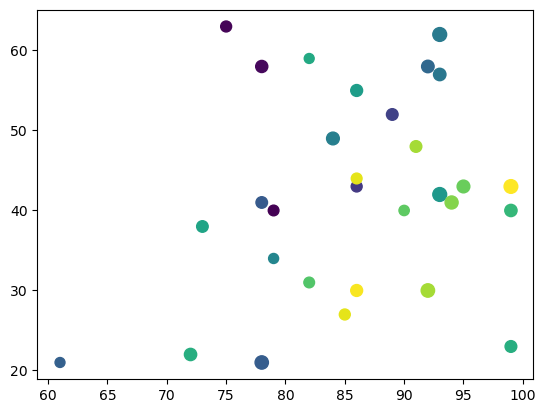

In [7]:
plt.scatter(df['Blood Pressure'], df['Age'],df['Weight'],df['Cholesterol'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
lr= LinearRegression()

In [11]:
lr.fit(df[['Age','Weight','Cholesterol']],df['Blood Pressure'])

LinearRegression()

In [12]:
print(lr.coef_, lr.intercept_)

[0.26450063 0.25175153 0.15877913] 23.93667095183956


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
print("r2_score:",r2_score(df['Blood Pressure'], lr.predict(df[['Age','Weight','Cholesterol']])))

r2_score: 0.5188834494557739


In [15]:
print("mean_squared_error:", mean_squared_error(df['Blood Pressure'], lr.predict(df[['Age','Weight','Cholesterol']])))

mean_squared_error: 37.7671146437767


In [ ]:
lr.predict([[63,]])

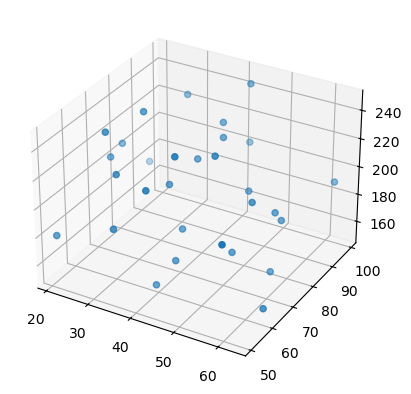

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Weight'], df['Cholesterol'])

In [19]:
import numpy as np

age_range = np.linspace(df['Age'].min(), df['Age'].max(), 30)
weight_range = np.linspace(df['Weight'].min(), df['Weight'].max(), 30)

age_grid, weight_grid = np.meshgrid(age_range, weight_range)


In [20]:
chol_levels = [
    df['Cholesterol'].min(),
    df['Cholesterol'].mean(),
    df['Cholesterol'].max()
]

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


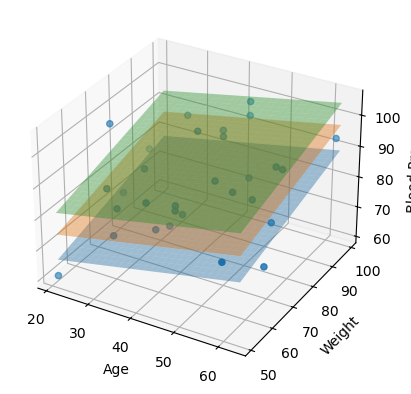

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Actual data points
ax.scatter(
    df['Age'],
    df['Weight'],
    df['Blood Pressure']
)

# Draw a plane for each cholesterol level
for chol in chol_levels:
    bp_pred = lr.predict(
        np.c_[age_grid.ravel(),
              weight_grid.ravel(),
              np.full(age_grid.size, chol)]
    ).reshape(age_grid.shape)

    ax.plot_surface(
        age_grid,
        weight_grid,
        bp_pred,
        alpha=0.4
    )

ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Blood Pressure')

plt.show()


In [22]:
lr1= LinearRegression()
lr1.fit(df[['Age','Weight']],df['Blood Pressure'])
print("r2_score:",r2_score(df['Blood Pressure'], lr1.predict(df[['Age','Weight']])))

r2_score: 0.3006834936301712


In [25]:
from itertools import combinations

In [26]:
features = ['Age', 'Weight', 'Cholesterol']
y = df['Blood Pressure']

In [27]:
results = []

for r in range(1, len(features) + 1):
    for combo in combinations(features, r):
        X = df[list(combo)]

        model = LinearRegression()
        model.fit(X, y)

        y_pred = model.predict(X)

        results.append({
            'Features': combo,
            'R2': r2_score(y, y_pred),
            'MSE': mean_squared_error(y, y_pred)
        })


In [28]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.sort_values(by='R2', ascending=False)


,Features,R2,MSE
6,"(Age, Weight, Cholesterol)",0.518883,37.767115
5,"(Weight, Cholesterol)",0.401384,46.990704
4,"(Age, Cholesterol)",0.364217,49.908250
3,"(Age, Weight)",0.300683,54.895569
1,"(Weight,)",0.265958,57.621467
2,"(Cholesterol,)",0.194134,63.259610
0,"(Age,)",0.056353,74.075232
